In [21]:
import pandas as pd 
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [4]:
redwine = pd.read_csv('winequality-red.csv')

In [5]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
print(f'max {redwine["quality"].max()}')
print(f'min {redwine["quality"].min()}')

max 8
min 3


In [14]:
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
r2_list = []

colss = []

for item in redwine.columns:
    if item =='quality':
        continue
    else:
        colss.append(item)

for i in colss:
    
    df_taste = redwine[i].values.reshape(-1,1)
    df_y = redwine['quality']

    improved_model = LinearRegression()

    training = df_taste[:int(0.8*len(df_taste))]
    trainingwa = df_y[:int(0.8*len(df_y))]

    testing = df_taste[int(0.8*len(df_taste)):]
    testingwa = df_y[int(0.8*len(df_y)):]

    improved_model.fit(training, trainingwa)

    predwa = improved_model.predict(testing)
    mse = mean_squared_error(testingwa, predwa)

    r2 = r2_score(testingwa, predwa)
    r2_list.append([r2,i])
    

    
print(r2_list)

r2_list_sort = []

n = 0

for i in r2_list:
    i = i[0]
    r2_list_sort.append(i)
    
r2_list_sort.sort(reverse=True)

for i, item in enumerate(r2_list_sort):
    print(i, item)
    

[[-0.02385347408450822, 'fixed acidity'], [0.16878809983449006, 'volatile acidity'], [0.02479495166433343, 'citric acid'], [-0.03345939869249137, 'residual sugar'], [-0.012054960622460253, 'chlorides'], [-0.040720141990529424, 'free sulfur dioxide'], [-0.053948607203813115, 'total sulfur dioxide'], [-0.05501539112889109, 'density'], [-0.02972569440989692, 'pH'], [0.09093102557863775, 'sulphates'], [0.09642642077582808, 'alcohol']]
0 0.16878809983449006
1 0.09642642077582808
2 0.09093102557863775
3 0.02479495166433343
4 -0.012054960622460253
5 -0.02385347408450822
6 -0.02972569440989692
7 -0.03345939869249137
8 -0.040720141990529424
9 -0.053948607203813115
10 -0.05501539112889109


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#gather data on each individual variable to be able to gain a idea of
# "the weight each variable takes"
r2_list = []
colss = []

for item in redwine.columns:
    if item == 'quality':
        continue
    else:
        colss.append(item)

for i, col in enumerate(colss):
    df_taste = redwine[[col]]
    df_y = redwine['quality']

    improved_model = LinearRegression()

    training = df_taste.iloc[:int(0.8*len(df_taste))]
    trainingwa = df_y.iloc[:int(0.8*len(df_y))]

    testing = df_taste.iloc[int(0.8*len(df_taste)):]
    testingwa = df_y.iloc[int(0.8*len(df_y)):]

    improved_model.fit(training, trainingwa)

    predwa = improved_model.predict(testing)
    mse = mean_squared_error(testingwa, predwa)

    print(f"MSE for unseen data: {mse}")

    r2 = r2_score(testingwa, predwa)
    print("R-squared:", r2)
    
    r2_list.append((r2, col))

# Sort the list in descending order of R-squared values
r2_list.sort(reverse=True)

# Print the R-squared values for each feature in descending order
for r2, col in r2_list:
    print(f"Feature: {col}, R-squared: {r2}")


MSE for unseen data: 0.6200712602424302
R-squared: -0.02385347408450822
MSE for unseen data: 0.5034027070377369
R-squared: 0.16878809983449006
MSE for unseen data: 0.590608557398288
R-squared: 0.02479495166433343
MSE for unseen data: 0.6258888483331401
R-squared: -0.03345939869249137
MSE for unseen data: 0.6129257855269775
R-squared: -0.012054960622460253
MSE for unseen data: 0.6302861359930143
R-squared: -0.040720141990529424
MSE for unseen data: 0.6382976252378093
R-squared: -0.053948607203813115
MSE for unseen data: 0.6389436962524345
R-squared: -0.05501539112889109
MSE for unseen data: 0.6236276236769938
R-squared: -0.02972569440989692
MSE for unseen data: 0.5505548976339375
R-squared: 0.09093102557863775
MSE for unseen data: 0.547226748917639
R-squared: 0.09642642077582808
Feature: volatile acidity, R-squared: 0.16878809983449006
Feature: alcohol, R-squared: 0.09642642077582808
Feature: sulphates, R-squared: 0.09093102557863775
Feature: citric acid, R-squared: 0.02479495166433343


In [20]:
# now gather all the possible variables to get a idea of how the model prefoms with a 
# multivarient analysis

train_data = redwine.drop("quality", axis = 1)
train_data = train_data.iloc[:int(0.8*len(redwine))]
train_target = redwine["quality"].iloc[:int(0.8*len(redwine))]

test_data = redwine.drop("quality", axis = 1)
test_data = test_data.iloc[int(0.8*len(redwine)):]
test_target = redwine["quality"].iloc[int(0.8*len(redwine)):]

model.fit(train_data, train_target)

pred = model.predict(test_data)

mse = mean_squared_error(test_target, pred)

print(f'MSE: {mse}')

rsme = np.sqrt(mse)

print(rsme)

r2 = r2_score(test_target, pred)
print("R-squared:", r2)


MSE: 0.43152246279404205
0.6569036936979743
R-squared: 0.2874758096280007


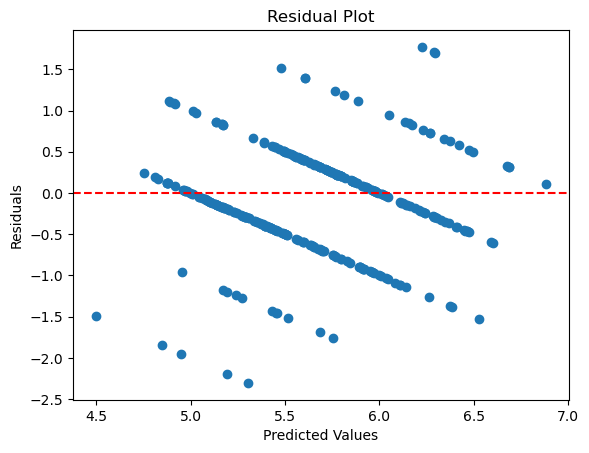

In [23]:
# analyse the residual values
# using a scatter plot 

residuals = test_target - pred

plt.scatter(pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot a horizontal line at y = 0
plt.axhline(y=0, color='r', linestyle='--')

plt.show()



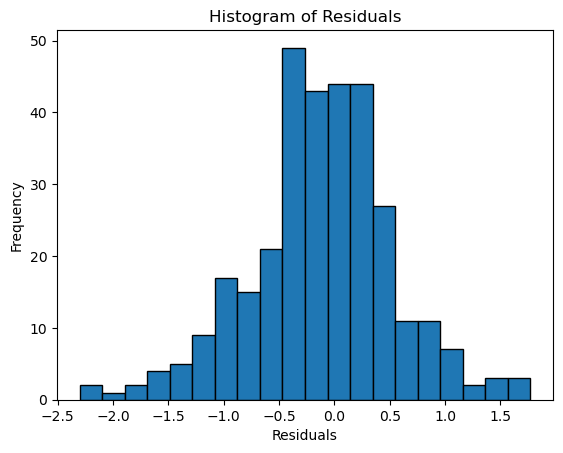

In [24]:
# this shows that some of the values are not being captured 
# check for normal distribution 

plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [25]:
# slight bell curve around 0 but could be improved 

In [31]:
# creating user input

print("please select 3 traits to choose from")

for i, item in enumerate(colss,start=1,):
    print(i, item)
    
print("please choose from the corresponding numbers ")
    
user_choice_1 = input("choice 1: ")
user_choice_2 = input("choice 2: ")
user_choice_3 = input("choice 3: ")

user_choice_1 = int(user_choice_1) - 1
user_choice_2 = int(user_choice_2) - 1
user_choice_3 = int(user_choice_3) - 1

def create_model(u1, u2, u3, colss, dataframe1):
    
    user_model = LinearRegression()
    
    df = dataframe1[[colss[u1],colss[u2],colss[u3], "quality"]]
    
    train_data = df[[colss[u1],colss[u2],colss[u3]]].iloc[:int(0.8*len(df))]
    train_target = df["quality"].iloc[:int(0.8*len(df))]

    test_data = df[[colss[u1],colss[u2],colss[u3]]].iloc[int(0.8*len(df)):]
    test_target = df["quality"].iloc[int(0.8*len(df)):]
    user_model.fit(train_data, train_target)
    
    return user_model
    
    
user_model = create_model(user_choice_1,user_choice_2,user_choice_3, colss, redwine)

print('''Alright people im getting thirsty!
      Give me the data for each option and i can rate the quality of the wine!''')

data_u1 = input(f'data for {colss[user_choice_1]}: ')
data_u2 = input(f'data for {colss[user_choice_2]}: ')
data_u3 = input(f'data for {colss[user_choice_3]}: ')

data_u1 = float(data_u1)
data_u2 = float(data_u2)
data_u3 = float(data_u3)

def model_prediction(d1,d2,d3,u1,u2,u3,colss,user_model):
    
    user_data = pd.DataFrame({
        colss[u1]:[d1],
        colss[u2]:[d2],
        colss[u3]:[d3],
    })
        
    model_response = user_model.predict(user_data)
    return model_response

model_response = model_prediction(data_u1, data_u2, data_u3, user_choice_1,user_choice_2,user_choice_3, colss, user_model)

print(f'This is the predicted quality of your wine! {model_response}')
    
    

please select 3 traits to choose from
1 fixed acidity
2 volatile acidity
3 citric acid
4 residual sugar
5 chlorides
6 free sulfur dioxide
7 total sulfur dioxide
8 density
9 pH
10 sulphates
11 alcohol
please choose from the corresponding numbers 
choice 1: 9
choice 2: 10
choice 3: 11
Alright people im getting thirsty!
      Give me the data for each option and i can rate the quality of the wine!
data for pH: 3.5
data for sulphates: 0.75
data for alcohol: 9.37
This is the predicted quality of your wine! [5.22739799]


In [32]:
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
# Modeling wine preferences by data mining from physicochemical properties. 
# In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

(1599, 12)